In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import special as sp
import matplotlib.colors as mcolors
from scipy.stats import norm
import seaborn as sns

In [21]:
import sys

sys.path.append('../omico')

import plot as pl
import table as tb
import session as es

sys.path.append('../dglv')

import sampler as dg

In [3]:
def ebar_style(color='black'):

    return {'capsize':10,
            'capthick':2,
            'linewidth':3.5,
            'markeredgewidth':2.5,
            'marker':'H',
            'ms':25,
            'ecolor':'black',
            'markeredgecolor':'black',
            'color':color}

In [4]:
h_col='#006ddb'
u_col='#920000'

In [5]:
from matplotlib import rcParams

# Replace 'Avenir' with the actual font name used on your system
font_name = 'Avenir'

# Set Matplotlib font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = [font_name]
rcParams['text.usetex'] = False

# figure 2

In [6]:
import sys

sys.path.append('./omico')

import plot as pl
import fit as ft
import analysis as an
import table as tb
import session as es

engine=  'kaiju'
phen = 'diagnosis'
database= 'RefSeq'
protocol= 'relative_abundance'
scale = 'relative'

if engine=='core-kaiju': cuts=np.arange(1,21)
else: cuts = [9e-06,0.0007]

print(engine,phen,database,protocol)

phen_cuts=cuts
nbins,digits=0,0
phenotype_map=pd.Series(dtype=str)
re_group={}

re_group = {'H':'H','UC':'U','CD':'U','IBS-C':'U','IBS-D':'U'}

Pheno = es.tables_session(engine=engine,
                      database=database,
                      PROJ_ROOT='../..',
                      cuts=phen_cuts,
                      protocol=protocol,
                      group=phen,
                      phenotype_map=phenotype_map,
                      nbins=nbins,digits=digits,
                      re_group=re_group
                      )

kaiju diagnosis RefSeq relative_abundance
SESSION > engine:kaiju / databse:RefSeq / group:diagnosis / protocol:relative_abundance

Loading ../../data/JKR2meta/kaiju_RefSeq_table.csv
Phenotype from metadata: diagnosis
Categorical phenotype

Phenotype: H
Cut-off: 9.00e-06 / Cut-off: 7.00e-04 / 
Phenotype: U
Cut-off: 9.00e-06 / Cut-off: 7.00e-04 / 

# figures 3,4

In [7]:
R=pd.read_csv('../../data/inference_results/final.csv',index_col='Unnamed: 0')
del R['c_avg'],R['c_std']

R=R[R['env'].isin(['gutH','gutU'])]
R['sigma_K']=0

R['bc']=R['beta']/R['beta_cr_replicon']
R['sc']=R['sigma']/R['sigma_cr_replicon']

R['zeta_avg'] = ( R.K - R.h_pred * R.mu )
R['zeta_std'] = np.sqrt( R.q0_pred * R.sigma**2 )

R['c_avg'] = R.beta * R.zeta_avg
R['c_std'] = R.beta * R.zeta_std

R['nu'] = R.beta * R.lam

R['mass'] = 1 - R.beta * (R.qd_pred - R.q0_pred) * R.sigma**2 

R['zeta_star'] = np.sqrt(4*R.mass*(1-R.nu)/R.beta)

R['MMBR']=pd.Series(index=R.index,data=0)

Rh=R[R['env']=='gutH']
Ru=R[R['env']=='gutU']

Rh=Rh.iloc[:30]
Ru=Ru.iloc[:30]

Ru['alpha']=Ru.RelErr.min() / Ru.RelErr
Rh['alpha']=Rh.RelErr.min() / Rh.RelErr

In [8]:
def pN_min(zm,zs,std):
    
    z1=(zs+zm)/(np.sqrt(2*std**2))
    z2=(zs-zm)/(np.sqrt(2*std**2))
    return 0.5*( sp.erfc(z1)+sp.erfc(z2) )

In [9]:
for p,D in zip(['H','U'],[Rh,Ru]):
    
    D['phi'] = pN_min(zm=D.zeta_avg,zs=D.zeta_star,std=D.zeta_std)

In [10]:
dataH={'K':0.00152500,'h':0.00050623,'q0':0.00000028,'qd':0.00002818}
dataU={'K':0.00327430,'h':0.00062339,'q0':0.00000065,'qd':0.00005348}

In [11]:
h_style={'color':h_col,'linewidth':2,'edgecolor':'black'}
u_style={'color':u_col,'linewidth':2,'edgecolor':'black'}

In [12]:
redR=R.loc[list(range(30))+list(range(100,130))]
redR=redR[['env','h_pred','q0_pred','qd_pred']].rename(columns={'h_pred':'h','q0_pred':'q0','qd_pred':'qd'})


In [13]:
dats = {'H':dataH,'U':dataU}
col={'H':h_col,'U':u_col}

# figure 3

In [15]:
re_group = {'H':'H','UC':'D','CD':'D','IBS-C':'D','IBS-D':'D'}

cut = -np.inf

MB = es.tables_session( engine='kaiju',
                        database='RefSeq',
                        PROJ_ROOT='../..',
                        cuts=[cut,9e-06],
                        protocol='relative_abundance',
                        group='diagnosis',
                        phenotype_map=pd.Series(dtype=str),
                        nbins=0,digits=0,
                        re_group=re_group )

SESSION > engine:kaiju / databse:RefSeq / group:diagnosis / protocol:relative_abundance

Loading ../../data/JKR2meta/kaiju_RefSeq_table.csv
Phenotype from metadata: diagnosis
Categorical phenotype

Phenotype: H
Cut-off: -inf / Cut-off: 9.00e-06 / 
Phenotype: D
Cut-off: -inf / Cut-off: 9.00e-06 / 

In [16]:
Du = MB['T']['D'][9e-06].form['binary'].sum(axis=0)
Su_harmonic = 1/np.mean(1/Du)

Dh = MB['T']['H'][9e-06].form['binary'].sum(axis=0)
Sh_harmonic = 1/np.mean(1/Dh)

# here, i'm plotting the interactions 

$ \alpha = \frac{\mu}{S} + \frac{\sigma}{\sqrt{S}}z$

where S is the gamma diversity of species (in the spirit of everything is everywhere)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not foun

H 1.7$ \times 10^{-4}$ 4.8$ \times 10^{-2}$
D -5.4$ \times 10^{-5}$ 2.6$ \times 10^{-2}$


findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not foun

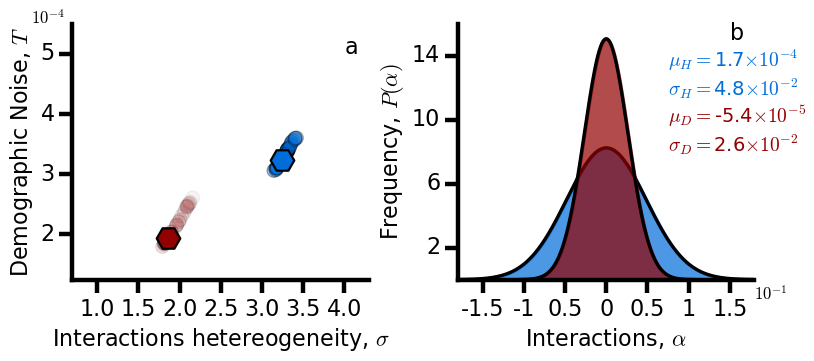

findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not foun

In [19]:
fig, ax = plt.subplots(ncols=2,figsize=(11,4))
fig.patch.set_facecolor('white')
plt.subplots_adjust(wspace=0.3, hspace=0.)

for i in range(2):
    ax[i].tick_params(axis='both', which='major', labelsize=20,length=12,width=4,direction='out',top=False,right=False)        
    for axis in ['bottom','left']: ax[i].spines[axis].set_linewidth(4)
    for axis in ['right','top']: ax[i].spines[axis].set_visible(False)


ax[0].scatter( Ru.sigma,1/Ru.beta,alpha=Ru.alpha,s=150,edgecolor='black',color=u_col,label='Diseased',zorder=3 )
ax[0].scatter( Ru.sigma.iloc[0],1/Ru.beta.iloc[0],s=450,marker='H',**u_style,zorder=3 )

ax[0].scatter( Rh.sigma,1/Rh.beta,alpha=Rh.alpha,s=150,edgecolor='black',color=h_col,label='Healthy',zorder=3 )
ax[0].scatter( Rh.sigma.iloc[0],1/Rh.beta.iloc[0],s=450,marker='H',**h_style,zorder=3 )

#plt.yscale('log')

#ax[0].set_yticks( [2e-4,3e-4,4e-4],[2,3,4])
ax[0].set_yticks( [1e-4,2e-4,3e-4,4e-4,5e-4],[1,2,3,4,5])
ax[0].set_ylim(1.25e-4,5.5e-4)
#ax[0].set_ylim(,0.0000)
ax[0].set_xlabel('Interactions hetereogeneity, $\\sigma$',fontsize=20)
ax[0].set_ylabel('Demographic Noise, $T$',fontsize=20)
ax[0].text(x=0.2,y=5.5e-4,s='$10^{-4}$',fontsize=15)
ax[0].set_xlim(0.7,4.3)

######################################################
disorder={}

for p,c,X,h in zip(['H','D'],[h_col,u_col],[Rh,Ru],[11.5,8]):
    
    disorder[p]={}
    
    S = len( MB['T'][p][9e-06].components )
    disorder['mu']=X.iloc[0]['mu'] / S
    disorder['sigma']=X.iloc[0]['sigma'] / np.sqrt(S)
    
    #mu_str = "{:.1e}".format(disorder['mu'])
    mu_str = "{:.1e}".format(disorder['mu'])
    mu_str = mu_str.replace('e', r'$ \times 10^{' + str(int(mu_str.split('e')[1])) + '}$')
    mu_str=mu_str[:-3]

    sigma_str = "{:.1e}".format(disorder['sigma'])
    sigma_str = sigma_str.replace('e', r'$ \times 10^{' + str(int(sigma_str.split('e')[1])) + '}$')
    sigma_str=sigma_str[:-3]
    
    print(p,mu_str,sigma_str)
    
    values = f'$\mu_{p}=$'+f'{mu_str}\n'+f'$\sigma_{p}=$'+f'{sigma_str}'
    ax[1].text(x=0.075,y=h,s=values,fontsize=17.5,color=c)
    
    x_values = np.linspace(disorder['mu'] - 4 * disorder['sigma'], disorder['mu'] + 4 * disorder['sigma'], 1000)
    y_values = norm.pdf(x_values, disorder['mu'], disorder['sigma'])

    ax[1].fill_between(x_values,np.zeros(1000),y_values,linewidth=3,color=c,zorder=1,alpha=0.7)
    ax[1].plot(x_values,y_values,linewidth=3,color='black',zorder=1)
    
ax[1].set_xlim(-0.23,0.23)

ax[1].set_xticks( [-0.15,-0.1,-0.05,0,0.05,0.1,0.15],[-1.5,-1,0.5,0,0.5,1,1.5])
ax[1].set_xlim(-0.18,0.18)
ax[1].set_ylim(0,16)
ax[1].set_yticks( [2,6,10,14])

ax[1].text(x=0.18,y=-1.25,s='$10^{-1}$',fontsize=15)

#ax[0].text(s='a',fontsize=17.5,x=3.45,y=4.5e-4)
#ax[1].text(s='b',fontsize=17.5,x=0.145,y=15)

ax[1].set_xlabel('Interactions, $ \\alpha$',fontsize=20)
ax[1].set_ylabel('Frequency, $P (\\alpha)$',fontsize=20)

ax[0].text(s='a',x=4,y=0.0005,fontsize=20)
ax[1].text(s='b',x=0.15,y=15,fontsize=20)

plt.show()

fig.savefig(f'../../plots/maintext/figure3/figure3.svg', transparent=True, dpi=150,bbox_inches='tight',format='svg')
fig.savefig(f'../../plots/maintext/figure3/figure3.png', transparent=True, dpi=150,bbox_inches='tight')
fig.savefig(f'../../plots/maintext/figure3/figure3.pdf', transparent=True, dpi=150,bbox_inches='tight')

plt.close()

# figure 3 - insert

/tmp/ipykernel_12819/1424227863.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_yscale('log')
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfo

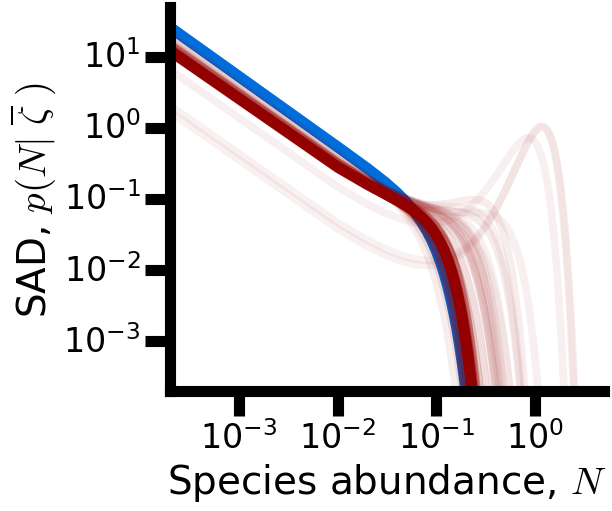

In [23]:
x=np.linspace(1e-4,1e2,10000)
fig,ax=plt.subplots(figsize=(7,6))
fig.patch.set_facecolor('white')

ax.tick_params(axis='both', which='major', labelsize=30,length=22.5,width=10,direction='out',top=False,right=False)        
ax.tick_params(axis='both', which='minor', labelsize=30,length=0,width=2,direction='in',top=False,right=False)        

for axis in ['bottom','left']: ax.spines[axis].set_linewidth(10)
for axis in ['right','top']: ax.spines[axis].set_visible(False)

for c,X in zip([h_col,u_col],[Rh,Ru]):
    
    #c=h_col
    #X=Rh

    for j in X.index:
        #print(j)
        C = dg.CavityDGLV( a=X.loc[j,'a'],b=X.loc[j,'b'],c=X.loc[j,'c_avg'] )
        p=C.pdf()
        ax.plot(x,p(x),color=c,linewidth=7,alpha=X.loc[j,'alpha'])

    j=X.index[0]
    C = dg.CavityDGLV( a=X.loc[j,'a'],b=X.loc[j,'b'],c=X.loc[j,'c_avg'])
    p=C.pdf()

    ax.plot(x,p(x),color=c,alpha=1,linewidth=10,label='Healthy')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlim(2e-4,5e0)
ax.set_ylim(2e-4,5e1)

ax.set_xlabel('Species abundance, $N$',fontsize=35)
ax.set_ylabel('SAD, $p( N | \ \overline{\zeta} \ )$',fontsize=35)

fig.savefig(f'../../plots/maintext/figure3/insert.svg', transparent=True, dpi=150,bbox_inches='tight',format='svg')
fig.savefig(f'../../plots/maintext/figure3/insert.png', transparent=True, dpi=150,bbox_inches='tight')
fig.savefig(f'../../plots/maintext/figure3/insert.pdf', transparent=True, dpi=150,bbox_inches='tight')

plt.show()
plt.close()

# figure 4

findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not found because none of the following families were found: Avenir
findfont: Generic family 'sans-serif' not foun

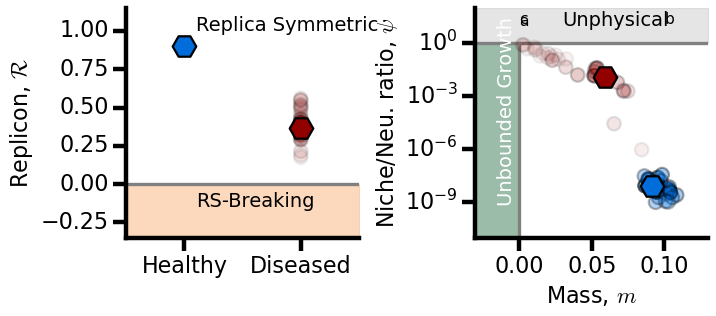

In [24]:
color='black'

fontsize=20

X=[0.5,0.7,1.5,1.7]

fig, ax = plt.subplots(ncols=2,figsize=(9,4))
fig.patch.set_facecolor('white')

for axi in ax:
    axi.tick_params(axis='both', which='major', labelsize=20,length=12,width=4,direction='out',top=False,right=False)        
    for axis in ['bottom','left']: axi.spines[axis].set_linewidth(4)
    for axis in ['right','top']: axi.spines[axis].set_visible(False)

ax[0].set_xticks( [0.5,1.5],['Healthy','Diseased'],fontsize=fontsize)
ax[0].set_yticks( [-0.25,0,0.25,0.5,0.75,1])
ax[0].set_xlim(0,2)

ax[0].set_ylabel('Replicon, $\mathcal{R}$',color=color,fontsize=fontsize)
ax[0].set_ylim(-0.35,1.15)

ax[0].fill_between(np.linspace(0,2),0*np.ones(50),-0.35*np.ones(50),color='#fab47c',alpha=0.5)
ax[0].plot(np.linspace(0,2),0*np.ones(50),color='grey',ls='-',linewidth=3)

ax[0].text(s='Replica Symmetric',x=0.6,y=1,rotation=0,color='black',fontsize=17.5)
ax[0].text(s='RS-Breaking',x=0.6,y=-0.15,rotation=0,color='black',fontsize=17.5)

#####################################################
### REPLICON

ax[0].scatter(X[0]*np.ones(30),Rh.RepliconNorm,alpha=Rh.alpha,s=150,**h_style)
ax[0].scatter(X[0],Rh.RepliconNorm.iloc[0],**h_style,s=450,marker='H')

ax[0].scatter(X[2]*np.ones(30),Ru.RepliconNorm,alpha=Ru.alpha,s=150,**u_style)
ax[0].scatter(X[2],Ru.RepliconNorm.iloc[0],**u_style,s=450,marker='H')

#####################################################
### SAD PHASE DIAGRAM

ax[1].scatter( Ru.mass,Ru.phi,alpha=Ru.alpha,s=150,**u_style ,zorder=3)
ax[1].scatter( Ru.mass.iloc[0],Ru.phi.iloc[0],s=450,marker='H',**u_style,zorder=3 )

ax[1].scatter( Rh.mass,Rh.phi,alpha=Rh.alpha,s=150,**h_style ,zorder=3)
ax[1].scatter( Rh.mass.iloc[0],Rh.phi.iloc[0],s=450,marker='H',**h_style,zorder=3 )

# UTILS

ax[1].set_yscale('log')

ax[1].set_yticks( [1e-9,1e-6,1e-3,1e0])
ax[1].set_ylim(1e-11,1e2)
ax[1].set_xlim(-0.03,0.13)

ax[1].set_xticks( [0,0.05,0.1])

ax[1].plot(0*np.ones(50),np.linspace(1e-11,1e0),color='grey',ls='-',linewidth=3)
ax[1].plot(np.linspace(-0.03,0.13),np.ones(50),color='grey',ls='-',linewidth=3)

ax[1].text(s='a',x=0.0,y=1e1,color='black',fontsize=14)
ax[1].text(s='b',x=0.1,y=1.2e1,color='black',fontsize=14)
ax[1].text(s='c',x=0.0,y=1.3e1,color='black',fontsize=14)

ax[1].text(s='Unbounded Growth',x=-0.015,y=1e-9,rotation=90,color='white',fontsize=17.5)
ax[1].text(s='Unphysical',x=0.03,y=1e1,color='black',fontsize=17.5)

#for y in np.logspace(0,2,10):
    
    #ax.plot(np.linspace(-0.03,0.13),y*np.ones(50),ls='-',color='grey')
    
ax[1].fill_between(np.linspace(-0.03,0),1e-11*np.ones(50),1e0*np.ones(50),color='#3B7A57',alpha=0.5,zorder=0)
ax[1].fill_between(np.linspace(-0.03,0.13),np.ones(50),1e2*np.ones(50),color='grey',alpha=0.2,zorder=0)

ax[1].set_xlabel('Mass, $m$',fontsize=fontsize)
ax[1].set_ylabel('Niche/Neu. ratio, $\\psi$',fontsize=fontsize)

fig.tight_layout(pad=0.75)

fig.savefig(f'../../plots/maintext/figure4/figure4.svg', transparent=True, dpi=150,bbox_inches='tight',format='svg')
fig.savefig(f'../../plots/maintext/figure4/figure4.png', transparent=True, dpi=150,bbox_inches='tight')
fig.savefig(f'../../plots/maintext/figure4/figure4.pdf', transparent=True, dpi=150,bbox_inches='tight')

